In [ ]:
!pip install tensorflow pandas numpy matplotlib seaborn scikit-learn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import xgboost as xgb
from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.sarimax import SARIMAX
import geopandas as gpd
import folium
from folium.plugins import HeatMap
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Dataco/dataco.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df.head())

  order date (DateOrders)          Sales  Days Delayed   Type  \
0              2015-01-07  232098.824450      0.498308  DEBIT   
1              2015-01-14  242413.194614      0.471369  DEBIT   
2              2015-01-21  235196.184509      0.631491  DEBIT   
3              2015-01-28  238982.384641      0.516049  DEBIT   
4              2015-02-04  230614.734504      0.614417  DEBIT   

   Days for shipping (real)  Customer Id Customer Segment   Category Name  \
0                  3.625212         2826         Consumer          Cleats   
1                  3.626556         1928         Consumer          Cleats   
2                  3.390285        11422         Consumer          Cleats   
3                  3.605761          396         Consumer          Cleats   
4                  3.503772          257         Consumer  Men's Footwear   

  Department Name   Latitude  ...  Order Item Discount Rate Order Item Id  \
0        Fan Shop  18.227573  ...                      0.12          

In [ ]:
print(df.columns)


Index(['order date (DateOrders)', 'Sales', 'Days Delayed', 'Type',
       'Days for shipping (real)', 'Customer Id', 'Customer Segment',
       'Category Name', 'Department Name', 'Latitude', 'Longitude',
       'Order City', 'Order Country', 'Order Id', 'Order Item Discount Rate',
       'Order Item Id', 'Order Item Profit Ratio', 'Order Item Quantity',
       'Sales After Discount', 'Order Profit Per Order', 'Order State',
       'Product Name', 'Product Price', 'Location'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load and preprocess the data
# Assuming `df` is your DataFrame with the listed columns
df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])
df.set_index('order_date', inplace=True)

# Aggregate data by week for each region (Latitude, Longitude, Order City)
weekly_data = df.groupby([pd.Grouper(freq='W'), 'Latitude', 'Longitude', 'Order City']).agg({
    'Sales': 'sum',
    'Days Delayed': 'mean',
    'Days for shipping (real)': 'mean'
}).reset_index()

# Pivot to create a time series per region
pivot_data = weekly_data.pivot_table(index='order_date', columns=['Latitude', 'Longitude', 'Order City'], values='Sales').fillna(0)

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(pivot_data)

# Prepare sequences for LSTM model
def create_sequences(data, seq_length=4):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Sequence length of 4 weeks (1 month)
X, y = create_sequences(scaled_data, seq_length=4)

# Reshape for LSTM input
X = X.reshape((X.shape[0], X.shape[1], X.shape[2]))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 263ms/step - loss: 0.0063 - val_loss: 0.0063
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0062 - val_loss: 0.0063
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0062 - val_loss: 0.0063
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0061 - val_loss: 0.0063
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0061 - val_loss: 0.0063
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0061 - val_loss: 0.0063
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0061 - val_loss: 0.0063
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0061 - val_loss: 0.0063
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0060 - val_loss: 0.0063
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0060 - val_loss: 0.0063
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0060 - val_loss: 0.0063
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0060 - val_loss: 0.0063


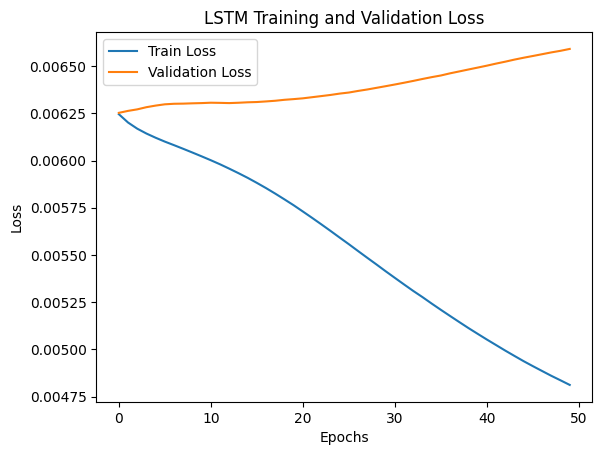

In [ ]:
# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50),
    Dense(X_train.shape[2])  # Output size is the number of locations (features)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Training and Validation Loss')
plt.legend()
plt.show()



In [ ]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Inverse scaling for interpretability
y_test = scaler.inverse_transform(y_test)

# Evaluate model accuracy
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Identify potential warehouse locations based on high demand and high delay areas
high_demand_regions = df.groupby(['Latitude', 'Longitude', 'Order City']).agg({
    'Sales': 'sum',
    'Days Delayed': 'mean'
}).reset_index()

# Filter regions with high demand and delays
potential_warehouse_locations = high_demand_regions[(high_demand_regions['Sales'] > high_demand_regions['Sales'].quantile(0.75)) &
                                                    (high_demand_regions['Days Delayed'] > high_demand_regions['Days Delayed'].quantile(0.75))]

print("Potential Warehouse Locations:\n", potential_warehouse_locations)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
Mean Absolute Error (MAE): 4543.131974518406
Root Mean Squared Error (RMSE): 17995.559617473024
Potential Warehouse Locations:
       Latitude  Longitude Order City          Sales  Days Delayed
8    18.225828 -66.370560   Estambul  248447.644951      0.614430
42   18.380119 -66.370514     Zanyán  253542.405131      0.646538
68   32.713036 -66.370537   Hamburgo  261106.515304      0.645733
76   33.046471 -66.370575     Berlín  256794.343517      0.625418
77   33.046471 -66.370567      Lagos  248208.874684      0.726758
79   33.144863 -66.370560      Viena  246514.054858      0.624406
89   33.863297 -66.370506      Lagos  254274.504976      0.631083
92   34.000626 -66.370613  Estocolmo  251088.564556      0.777778
116  38.118618 -66.370506     London  246817.484987      0.636881


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - loss: 0.2613 - val_loss: 0.2443
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2397 - val_loss: 0.2237
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2193 - val_loss: 0.2044
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2003 - val_loss: 0.1865
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1826 - val_loss: 0.1699
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1663 - val_loss: 0.1546
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1513 - val_loss: 0.1405
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1375 - val_loss: 0.1276
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1248 - val_loss: 0.1158
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1133 - val_loss: 0.1051
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1027 - val_loss: 0.0953
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0931 - val_loss: 0.0864
Epoch 13/50

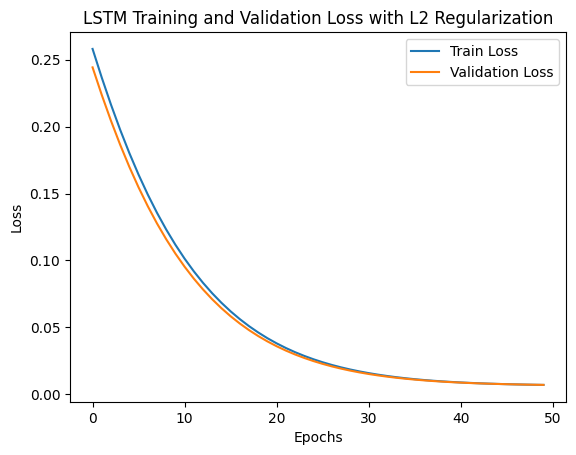

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

# Assuming weekly_demand_pivot data is already prepared

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define LSTM model with L2 regularization
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]), kernel_regularizer=l2(0.001)),
    LSTM(50, kernel_regularizer=l2(0.001)),
    Dense(X_train.shape[2])  # Output size is the number of locations (features)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Training and Validation Loss with L2 Regularization')
plt.legend()
plt.show()


Change here - Mei Teng

In [ ]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Inverse scaling for interpretability
y_test = scaler.inverse_transform(y_test)

# Evaluate model accuracy
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Identify potential warehouse locations based on high demand and high delay areas
high_demand_regions = df.groupby(['Latitude', 'Longitude', 'Order City']).agg({
    'Sales': 'sum',
    'Days Delayed': 'mean'
}).reset_index()

# Filter regions with high demand and delays
potential_warehouse_locations = high_demand_regions[(high_demand_regions['Sales'] > high_demand_regions['Sales'].quantile(0.75)) &
                                                    (high_demand_regions['Days Delayed'] > high_demand_regions['Days Delayed'].quantile(0.75))]

print("Potential Warehouse Locations:\n", potential_warehouse_locations)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
Mean Absolute Error (MAE): 2680.587107481065
Root Mean Squared Error (RMSE): 17472.307289033186
Potential Warehouse Locations:
       Latitude  Longitude Order City          Sales  Days Delayed
8    18.225828 -66.370560   Estambul  248447.644951      0.614430
42   18.380119 -66.370514     Zanyán  253542.405131      0.646538
68   32.713036 -66.370537   Hamburgo  261106.515304      0.645733
76   33.046471 -66.370575     Berlín  256794.343517      0.625418
77   33.046471 -66.370567      Lagos  248208.874684      0.726758
79   33.144863 -66.370560      Viena  246514.054858      0.624406
89   33.863297 -66.370506      Lagos  254274.504976      0.631083
92   34.000626 -66.370613  Estocolmo  251088.564556      0.777778
116  38.118618 -66.370506     London  246817.484987      0.636881


Added Cross Fold Validation

In [ ]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.regularizers import l2

# Set parameters
SEQ_LENGTH = 4  # Number of time steps in each sequence (e.g., 4 weeks)
NUM_SPLITS = 3  # Number of splits for cross-validation

# Define a function to create the LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape, kernel_regularizer=l2(0.001)),
        LSTM(50, kernel_regularizer=l2(0.001)),
        Dense(input_shape[1])  # Output size is the number of locations/features
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Prepare the data for LSTM: Convert time series data into sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i + seq_length]
        y = data[i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# Transform data for LSTM input
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=NUM_SPLITS)

# To store cross-validation results
mae_scores = []
rmse_scores = []

# Cross-validation loop
for train_index, test_index in tscv.split(X):
    # Split into train and test sets
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Create and train LSTM model
    model = create_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=0)

    # Make predictions
    predictions = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))

    # Store results
    mae_scores.append(mae)
    rmse_scores.append(rmse)

    # Print results for this fold
    print(f"MAE: {mae}, RMSE: {rmse}")

# Calculate and print average scores
print(f"Average MAE across folds: {np.mean(mae_scores)}")
print(f"Average RMSE across folds: {np.mean(rmse_scores)}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 280ms/step
MAE: 0.012671559874833803, RMSE: 0.07979613251879375


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 842ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 297ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


MAE: 0.012472447810879115, RMSE: 0.07931225708463377
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 269ms/step
MAE: 0.012409722275333941, RMSE: 0.07914148291573206
Average MAE across folds: 0.012517909987015621
Average RMSE across folds: 0.07941662417305319


In [ ]:
# Assuming predictions and y_test are arrays with scaled values
predictions_original_scale = scaler.inverse_transform(predictions)
y_test_original_scale = scaler.inverse_transform(y_test)

# Calculate MAE and RMSE on the original scale
mae_original = np.mean(np.abs(predictions_original_scale - y_test_original_scale))
rmse_original = np.sqrt(np.mean(np.square(predictions_original_scale - y_test_original_scale)))

print(f"MAE on original scale: {mae_original}")
print(f"RMSE on original scale: {rmse_original}")


MAE on original scale: 2727.0008932870232
RMSE on original scale: 17815.171751426937


Added Scaling consistency

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load and preprocess the data
df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])
df.set_index('order_date', inplace=True)

# Aggregate data by week for each region (Latitude, Longitude, Order City)
weekly_data = df.groupby([pd.Grouper(freq='W'), 'Latitude', 'Longitude', 'Order City']).agg({
    'Sales': 'sum',
    'Days Delayed': 'mean',
    'Days for shipping (real)': 'mean'
}).reset_index()

# Pivot to create a time series per region
pivot_data = weekly_data.pivot_table(index='order_date', columns=['Latitude', 'Longitude', 'Order City'], values='Sales').fillna(0)

# Initialize scaler and fit on the entire dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(pivot_data)
scaled_data = pd.DataFrame(scaled_data, columns=pivot_data.columns, index=pivot_data.index)

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

# Define sequence length (e.g., 4 weeks)
SEQ_LENGTH = 4
X, y = create_sequences(scaled_data.values, SEQ_LENGTH)

# Split into training and testing sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50),
    Dense(X_train.shape[2])  # Output shape matches the number of regions (columns)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Training and Validation Loss')
plt.legend()
plt.show()

# Make predictions
predictions = model.predict(X_test)

# Inverse transform predictions and test data for consistency
predictions_original_scale = scaler.inverse_transform(predictions)
y_test_original_scale = scaler.inverse_transform(y_test)

# Calculate MAE and RMSE on the original scale
mae = np.mean(np.abs(predictions_original_scale - y_test_original_scale))
rmse = np.sqrt(np.mean(np.square(predictions_original_scale - y_test_original_scale)))

print(f"Mean Absolute Error (MAE) on original scale: {mae}")
print(f"Root Mean Squared Error (RMSE) on original scale: {rmse}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - loss: 0.0062 - val_loss: 0.0063
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0062 - val_loss: 0.0063
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0062 - val_loss: 0.0063
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0061 - val_loss: 0.0063
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0061 - val_loss: 0.0063
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0061 - val_loss: 0.0063
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0061 - val_loss: 0.0063
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0061 - val_loss: 0.0063
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0060 - val_loss: 0.0063
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0060 - val_loss: 0.0063
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0060 - val_loss: 0.0063
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0060 - val_loss: 0.0063
Epoch 13/50

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
Mean Absolute Error (MAE) on original scale: 4640.133000270661
Root Mean Squared Error (RMSE) on original scale: 18036.762775450257
